In [10]:
from datetime import date
from dateutil.relativedelta import relativedelta
import datetime

# start = date(2017, 1, 1)
# end = date(2026, 1, 1)

start = '2017-01-01'
end = '2026-01-01'
start = datetime.datetime.strptime(start, '%Y-%m-%d')
end = datetime.datetime.strptime(end, '%Y-%m-%d')

current = start

while current <= end:
    # print(current.strftime("%Y"))
    print(current)
    current += relativedelta(days=1) # relativedelta(years=1)

2017-01-01 00:00:00
2017-01-02 00:00:00
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-07 00:00:00
2017-01-08 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00
2017-01-12 00:00:00
2017-01-13 00:00:00
2017-01-14 00:00:00
2017-01-15 00:00:00
2017-01-16 00:00:00
2017-01-17 00:00:00
2017-01-18 00:00:00
2017-01-19 00:00:00
2017-01-20 00:00:00
2017-01-21 00:00:00
2017-01-22 00:00:00
2017-01-23 00:00:00
2017-01-24 00:00:00
2017-01-25 00:00:00
2017-01-26 00:00:00
2017-01-27 00:00:00
2017-01-28 00:00:00
2017-01-29 00:00:00
2017-01-30 00:00:00
2017-01-31 00:00:00
2017-02-01 00:00:00
2017-02-02 00:00:00
2017-02-03 00:00:00
2017-02-04 00:00:00
2017-02-05 00:00:00
2017-02-06 00:00:00
2017-02-07 00:00:00
2017-02-08 00:00:00
2017-02-09 00:00:00
2017-02-10 00:00:00
2017-02-11 00:00:00
2017-02-12 00:00:00
2017-02-13 00:00:00
2017-02-14 00:00:00
2017-02-15 00:00:00
2017-02-16 00:00:00
2017-02-17 00:00:00
2017-02-18 00:00:00
2017-02-19 00:00:00


# Draw The Trend of BTC USDT

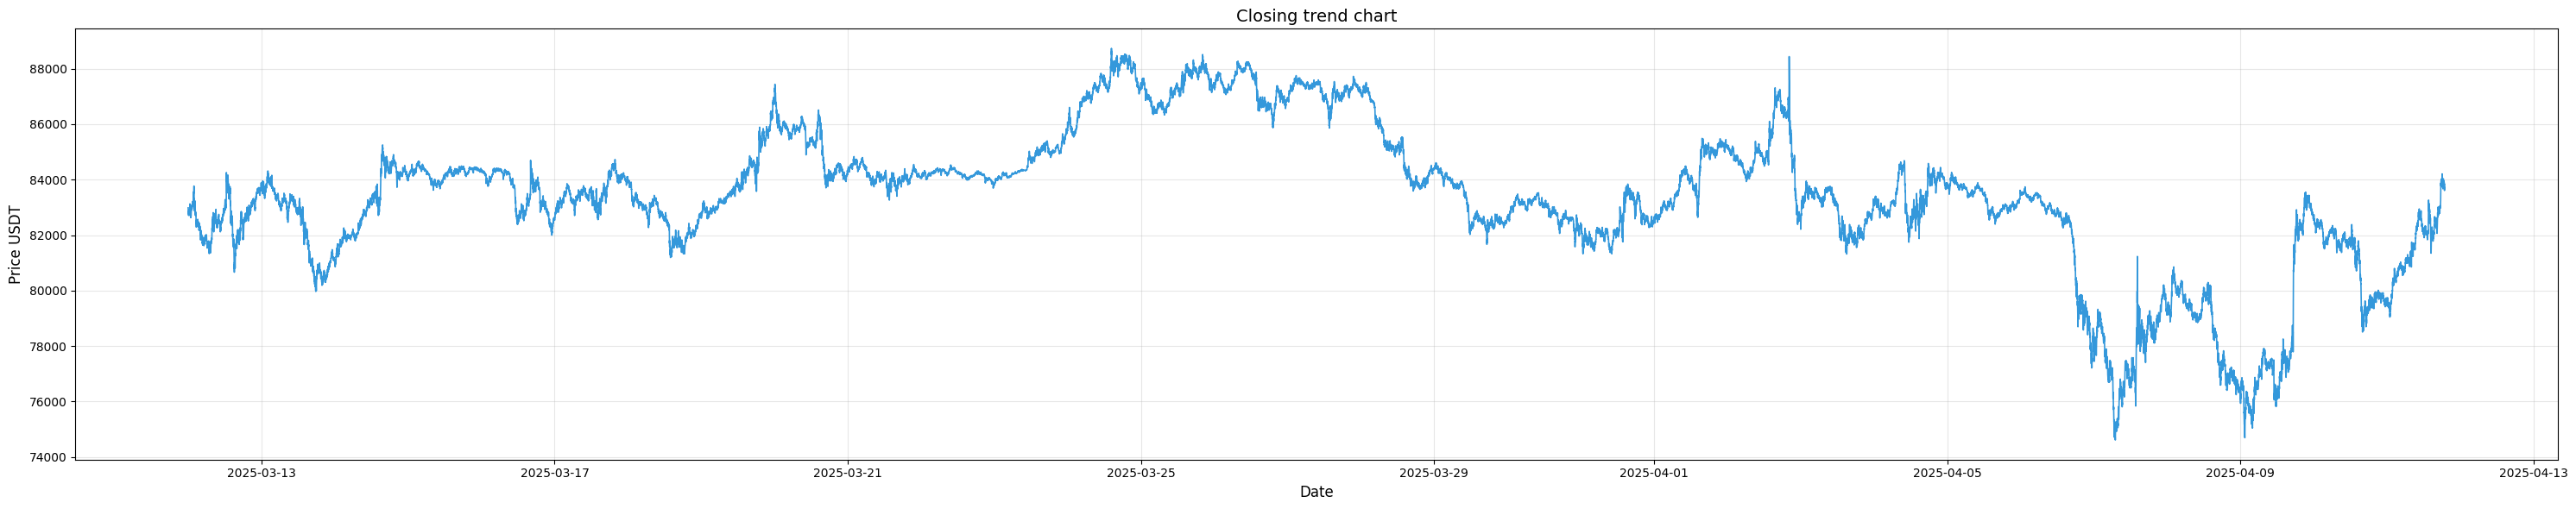

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


def load_data(csv_path='./data/BTC-USDT_2025-03-12_2025-04-12_1m.csv'):
    df = pd.read_csv(csv_path, parse_dates=['datetime'], index_col='datetime')
    df = df.sort_index()
    df = df[['open', 'high', 'low', 'close', 'volume']]
    df = df.ffill()
    return df


def draw_trend_chart(df):
    plt.figure(figsize=(30,6))
    plt.plot(df['close'], color='#3498DB', linewidth=1.2)
    plt.title('Closing trend chart', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price USDT', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    
df = load_data()
draw_trend_chart(df)

# Draw The Candlestick chart of BTC USDT

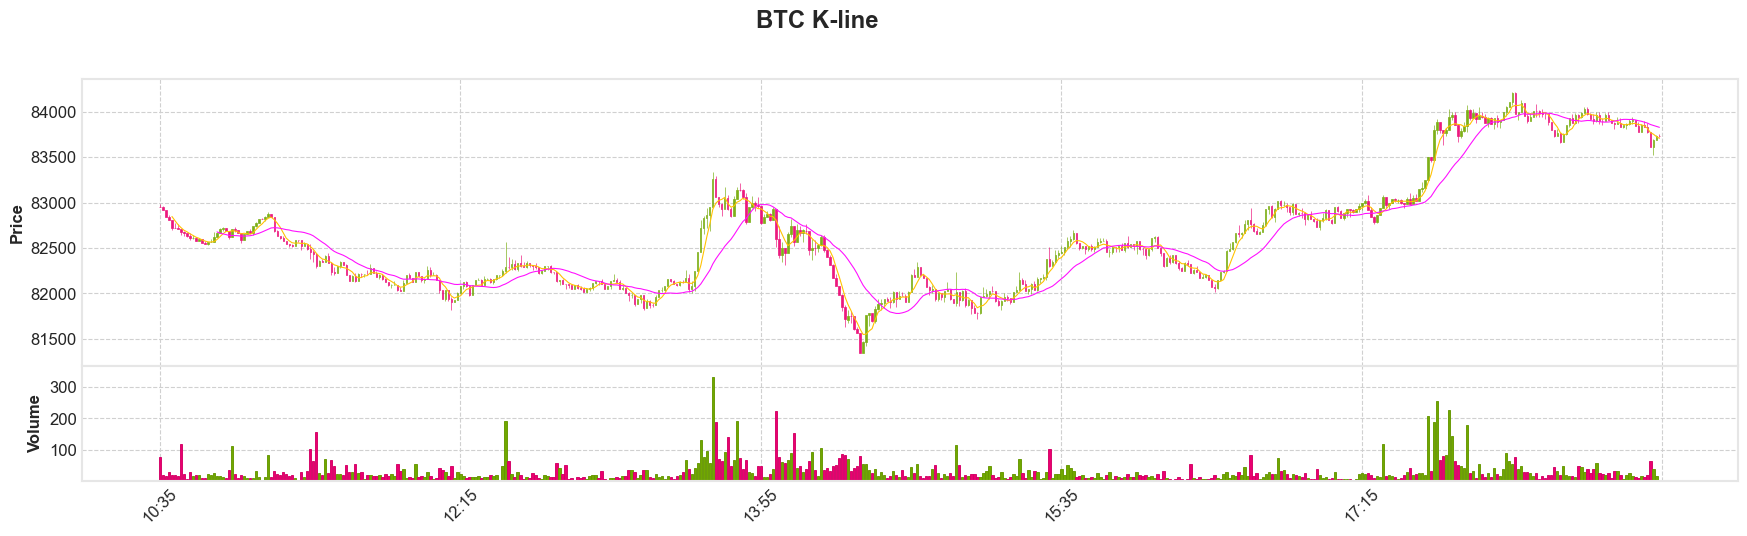

In [ ]:
import mplfinance as mpf

def kline(df):
    mpf.plot(df[-500:],  # 显示最近x条数据
            type='candle',
            style='binance', # 交易所风格配色
            title='BTC K-line',
            ylabel='Price',
            volume=True, # 叠加成交量柱状图
            mav=(5,20), # 显示5日和20日均线‌
            figratio=(60,15))

kline(df)

# 可交互K线图

In [13]:
import plotly.graph_objects as go


def interactive_visualization_kline(df):
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                                        open=df['open'],
                                        high=df['high'],
                                        low=df['low'],
                                        close=df['close'],
                                        )])
    fig.update_layout(title='交互式K线图', xaxis_rangeslider_visible=False)
    fig.show()

df = df[-100:]
interactive_visualization_kline(df)

In [ ]:
import pandas as pd
import numpy as np
# 假设df是包含价格数据的DataFrame, 'Close'列是收盘价
df['Short_MA'] = df['Close'].rolling(window=5).mean() # 计算短期均线
df['Long_MA'] = df['Close'].rolling(window=20).mean() # 计算长期均线
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1) # 生成信号:1表示买入,-1表示卖出/做空```


In [17]:
#code
import pandas as pd
from collections import OrderedDict
data = OrderedDict()
# datas = OrderedDict()
path = './data/BTC-USDT_2025-03-12_2025-04-12_1m.csv'
data['BTC'] = pd.read_csv(path, index_col=0, parse_dates=['datetime'])
data['BTC'].columns = ['Open', 'High', 'Low', 'Close', 'Volume']
print(data['BTC'].head())
type(data['BTC'])

                               Open      High       Low     Close    Volume
datetime                                                                   
2025-03-12 00:00:00+00:00  82932.99  83000.00  82927.23  82985.78  12.20062
2025-03-12 00:01:00+00:00  82985.78  82985.78  82850.00  82850.01   7.93602
2025-03-12 00:02:00+00:00  82850.01  82853.90  82773.99  82799.54  21.21357
2025-03-12 00:03:00+00:00  82799.54  82867.93  82781.22  82781.22  12.66108
2025-03-12 00:04:00+00:00  82781.22  82800.00  82727.28  82785.36  14.50121


pandas.core.frame.DataFrame

In [ ]:
import pytz



AttributeError: module 'pandas' has no attribute 'Panel'